In [1]:
import sys
sys.path.insert(0,'/Users/jarad/Fake Folder/Python Libraries')

from jb_libraries import * 
%matplotlib inline

from fab_data import *

import seaborn as sns

d_start = '2015-07-01'
d_end = '2018-09-30'

write = 'no'


== fab_data start ==

match

48 date lines where some date field is null even though the WO is marked as "completed"
WO date nulls even though WO is marked as "completed":

created
0
scheduled
0
active
40
completed
9

Fix these...

wo qty matches
process qty matches
spa qty matches


match
5725 unique WO(s)

match
5339 completed WO(s)

match
141 open WO(s)

match
245 pending WO(s)

your df is called "fab_data_main"


== fab_data end ==



### Create main df for this script

In [2]:
for col in ['start','end']:
    fab_data_main.drop(fab_data_main[fab_data_main['spa time ' + col] == '0000-00-00 00:00:00'].index, inplace = True)
    fab_data_main.reset_index(drop = True, inplace = True)
    fab_data_main['spa time ' + col] = pd.to_datetime(fab_data_main['spa time ' + col])

labor_main = fab_data_main[(fab_data_main['spa time start'].between(d_start, d_end))
                         & (fab_data_main['process group'].isin(['test','prep']))].copy()

labor_main['spa year and month'] = labor_main['spa time start'].map(str).str[:7]
labor_main['spa year and quarter'] = labor_main['spa time start'].dt.year.map(str) + '-0' + labor_main['spa time start'].dt.quarter.map(str)

t = len(labor_main)
same_times = labor_main[(labor_main['spa time end'] - labor_main['spa time start']).dt.seconds == 0]

print('{:,.0f} total lines\n{:,.0f} lines with same spa times\nthat is {:,.2f}% of the total'.format(t,len(same_times),len(same_times)/t * 100))
print('store them and drop them for now')
ix = same_times.index.tolist()
labor_main.drop(ix, axis = 0, inplace = True)

46,402 total lines
0 lines with same spa times
that is 0.00% of the total
store them and drop them for now


### Get time elapsed

In [3]:
labor_main['spa time elapsed'] = labor_main['spa time end'] - labor_main['spa time start']

n = labor_main[labor_main['spa time elapsed'].isnull()]
print('{:,.0f} null(s)\ndrop them'.format(len(n)))
labor_main.dropna(subset = ['spa time elapsed'], inplace = True)

labor_main['spa time elapsed (seconds)'] = labor_main['spa time elapsed'].dt.days*24*60*60 + labor_main['spa time elapsed'].dt.seconds

0 null(s)
drop them


### Get elapsed, group by some time period

In [4]:
#g = 'spa year and quarter'
g = 'spa year and month'
grouped = labor_main.groupby(g).agg({'spa time elapsed (seconds)':'sum'})
grouped.columns = ['elapsed (seconds)']
grouped.index.name = 'year and month'

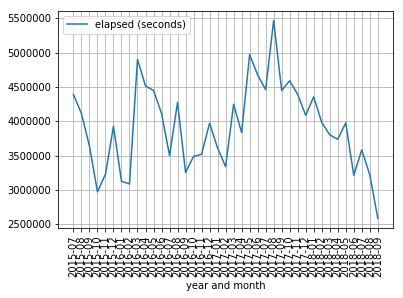

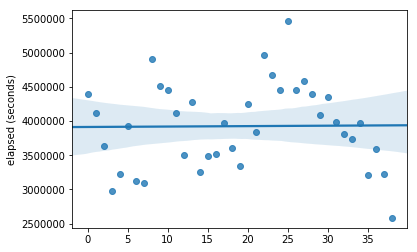

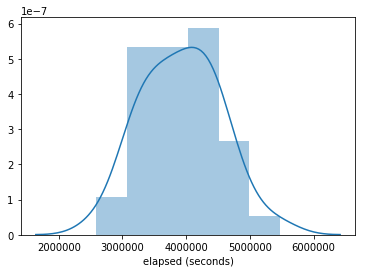

In [5]:
ax = grouped.plot(grid = True)
ax.set_xticks(np.arange(len(grouped)))
ax.set_xticklabels(grouped.index, rotation = 90)
plt.show()

x = np.arange(0,len(grouped))
y = grouped.iloc[:,0]
sns.regplot(x,y)
plt.show()

sns.distplot(y)
plt.show()

In [6]:
if write == 'yes':
    p = r'/Users/jarad/Fake Folder/Fab/Projects/Fab Hiring Metrics Project 2018/R/'
    t = 'Fab Hiring Metrics Projects 2018 - for R.xlsx'
    writer = pd.ExcelWriter(p + t, engine = 'xlsxwriter')
    grouped.reset_index().to_excel(writer, 'data', index = False)
    writer.close()

In [7]:
print('done')

done
